In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
sns.set()
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [112]:
data=pd.read_csv('/content/IndianHouseRent.csv')

In [113]:
data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [114]:
data.shape

(7691, 10)

In [115]:
data.isnull().sum()

,0
house_type,0
locality,0
city,0
area,0
beds,0
bathrooms,0
balconies,0
furnishing,0
area_rate,0
rent,0


<Axes: xlabel='city', ylabel='count'>

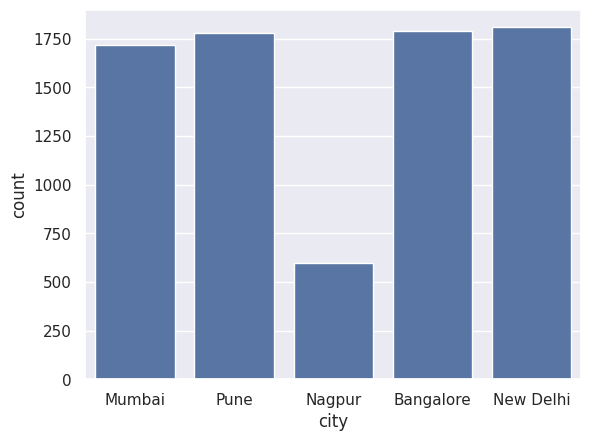

In [116]:
sns.countplot(x='city',data=data)

<Axes: xlabel='furnishing', ylabel='count'>

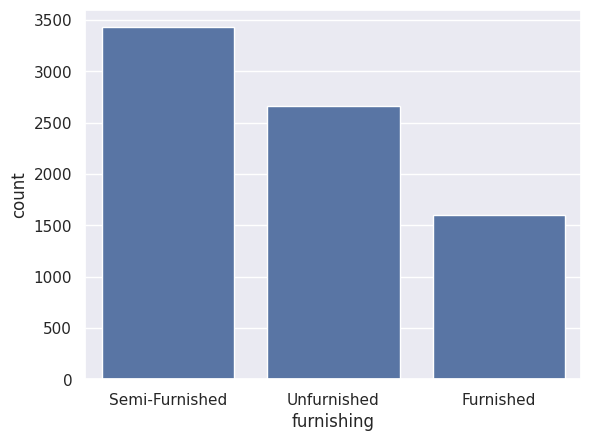

In [117]:
sns.countplot( x=data['furnishing'])

In [118]:
encoder=LabelEncoder()

In [119]:
data['city'] = encoder.fit_transform(data['city'])

data['locality'] = encoder.fit_transform(data['locality'])

data['furnishing'] = encoder.fit_transform(data['furnishing'])

In [120]:
data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",585,1,897.0,2,2,0,1,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",1389,1,490.0,1,1,0,1,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,1179,4,550.0,1,1,0,2,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",670,2,1000.0,2,2,0,2,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,1146,1,595.0,1,1,0,2,25.0,15000.0


Making a new column for BHK count.

In [121]:
data['bhk_count'] = data['house_type'].str.extract(r'(\d+)')

In [122]:
data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk_count
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",585,1,897.0,2,2,0,1,134.0,120000.0,2
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",1389,1,490.0,1,1,0,1,82.0,40000.0,1
2,1 BHK House for Rent in Mundhwa Pune,1179,4,550.0,1,1,0,2,22.0,12000.0,1
3,"2 BHK Flat for Rent in Hingna, Nagpur",670,2,1000.0,2,2,0,2,8.0,8000.0,2
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,1146,1,595.0,1,1,0,2,25.0,15000.0,1


In [123]:
x = data.drop(columns=['house_type'],inplace=True)

In [124]:
data.head()

,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk_count
0,585,1,897.0,2,2,0,1,134.0,120000.0,2
1,1389,1,490.0,1,1,0,1,82.0,40000.0,1
2,1179,4,550.0,1,1,0,2,22.0,12000.0,1
3,670,2,1000.0,2,2,0,2,8.0,8000.0,2
4,1146,1,595.0,1,1,0,2,25.0,15000.0,1


Splitting the data

In [125]:
y = data['rent']
x = data.drop('rent',axis=1)

In [126]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.18,random_state=7)

In [127]:
reg = XGBRegressor()

In [128]:
x_train['bhk_count'] = x_train['bhk_count'].astype(int)

x_test['bhk_count'] = x_test['bhk_count'].astype(int)

In [129]:
reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Training data Prediction Score

In [130]:
train_pred=reg.predict(x_train)

In [131]:
train_r2=r2_score(y_train,train_pred)

print("R Sqaure score on training data: ",train_r2)

R Sqaure score on training data:  0.9998576244897756


Testing data Prediction Score

In [132]:
test_pred=reg.predict(x_test)

In [133]:
test_r2=r2_score(y_test,test_pred)

print("R Sqaure score on testing data: ",test_r2)

R Sqaure score on testing data:  0.9789546815936276


Checking Error in Prediction

In [134]:
mape=mean_absolute_percentage_error(y_test,test_pred)

print("Mean Absolute Percentage Error: ",mape)

Mean Absolute Percentage Error:  0.044996720076412484
